## Qiskit Fall Fest - Introduction to Quantum Error Correction

#  Introduction: Beyond Mitigation
Welcome to Notebook 2! In the last session, we learned about Quantum Error Mitigation (QEM), which estimates a noise-free result from noisy runs.

Now, we'll learn about Quantum Error Correction (QEC), the long-term, scalable solution.

The Big Idea: Instead of just estimating the error, we will actively detect and correct it during the computation.

QEM vs. QEC:

QEM (Mitigation): Post-processing. Uses noisy results to estimate the ideal one. Does not protect qubits during computation.

QEC (Correction): Active process. Uses redundancy (many physical qubits) to encode one, robust logical qubit. It finds and fixes errors as they happen.


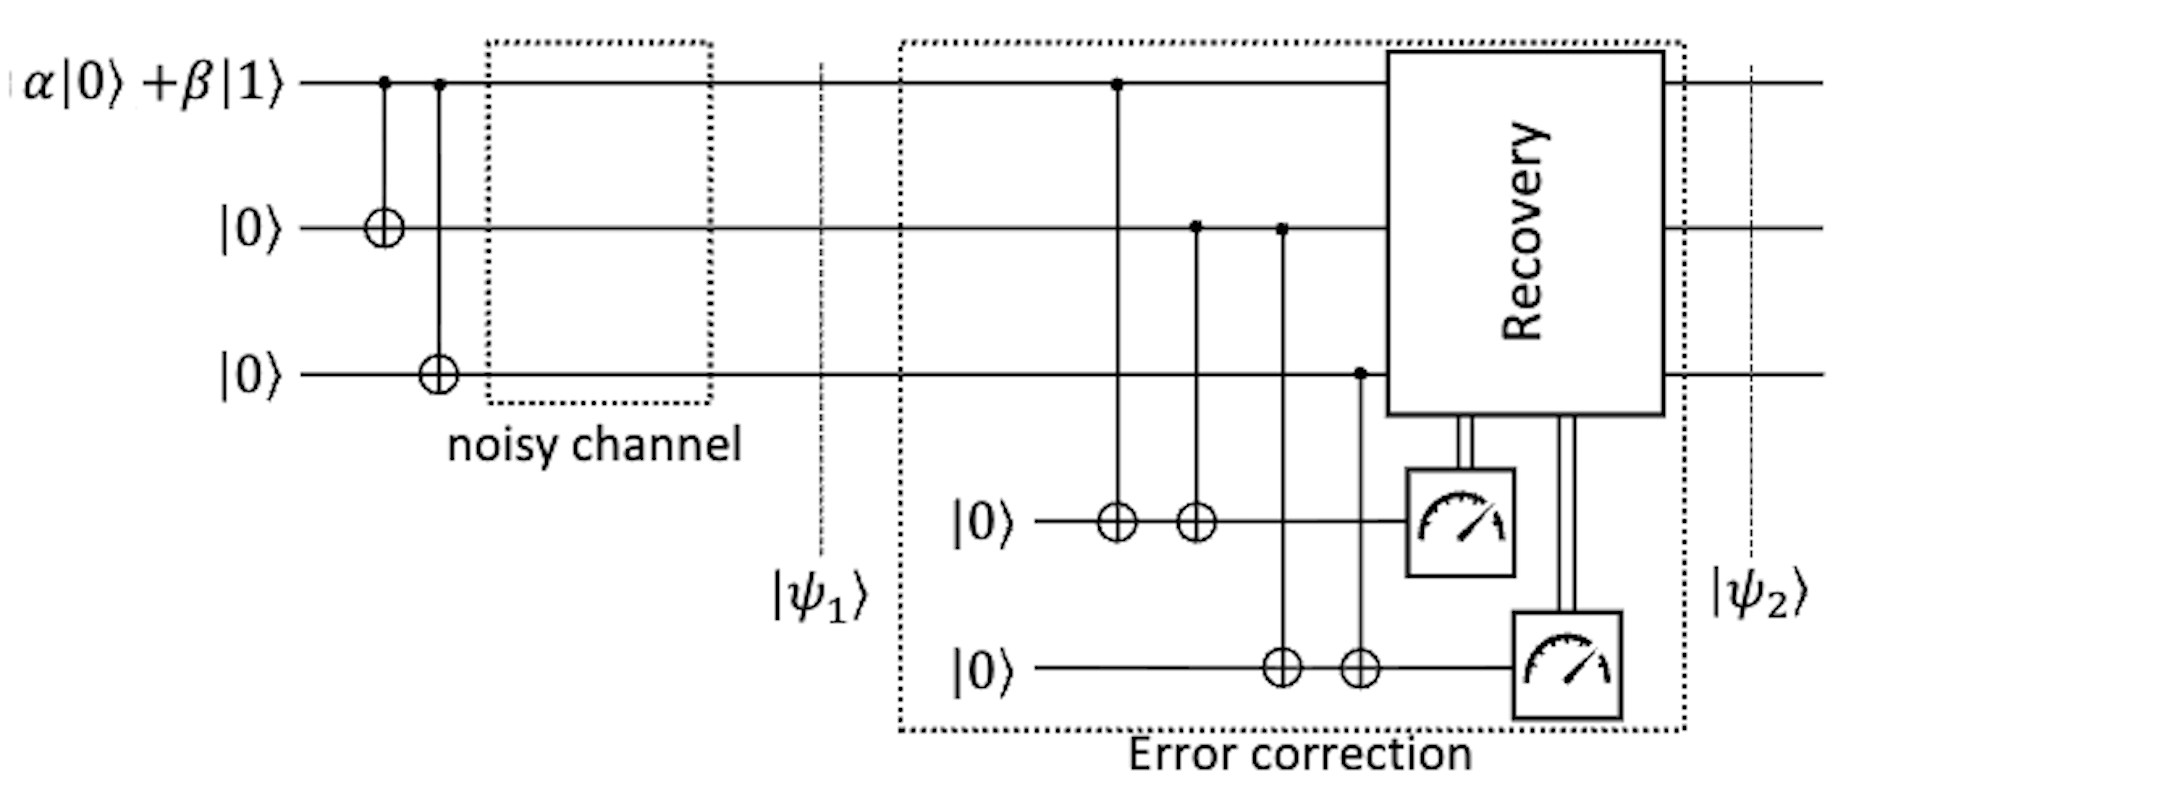

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Qiskit QEC package is not installed in this environment.
# To use QEC features, install with: pip install qiskit-qec

# Simulator
sim = AerSimulator()

In [ ]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

 Section 1: The 3-Qubit Bit-Flip Code

Concept: We can protect against a single bit-flip (X error) by using redundancy. We'll encode our 1-qubit state into 3 qubits.Logical $|0\rangle_L$: $|000\rangle$Logical $|1\rangle_L$: $|111\rangle$

Our logical state will be a superposition: $|\psi\rangle_L = \alpha|000\rangle + \beta|111\rangle$.

If an $X$ error hits qubit 1: $\alpha|000\rangle + \beta|111\rangle \rightarrow \alpha|0\textbf{1}0\rangle + \beta|1\textbf{0}1\rangle$.The state is corrupted! But notice... the "majority vote" is still correct. How do we detect this without measuring?

Syndrome Measurement:We can't measure the data qubits ($q_0, q_1, q_2$) directly, as that would collapse the superposition. Instead, we "ask" them questions using ancilla (helper) qubits.

We check the parity (are they a-pair-of-qubits the same or different?):Check $q_0$ and $q_1$: Measure $Z_0Z_1$.Check $q_1$ and $q_2$: Measure $Z_1Z_2$.

We can do this with CNOTs into two ancilla qubits ($a_0, a_1$):

Syndrome Table (Error $\rightarrow$ Syndrome a1, a0):
- No Error $\rightarrow$ 00
- $X$ on $q_0$ $\rightarrow$ 10
- $X$ on $q_1$ $\rightarrow$ 11
- $X$ on $q_2$ $\rightarrow$ 01

Based on the syndrome, we apply a correction!

## Exercise 1: Build the Bit-Flip Code

Task: Let's build the full QEC circuit.
1. Encode: Start with a logical qubit (q_d[0]) in state $|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}$. Encode this into the 3-qubit logical state $\frac{|000\rangle + |111\rangle}{\sqrt{2}}$.
2. Error: Manually add an X error to q_d[1].
3. Syndrome: Build the syndrome measurement circuit shown above.
4. Correct: This is the tricky part! We can use c_if to apply a correction based on the classical syndrome bits.

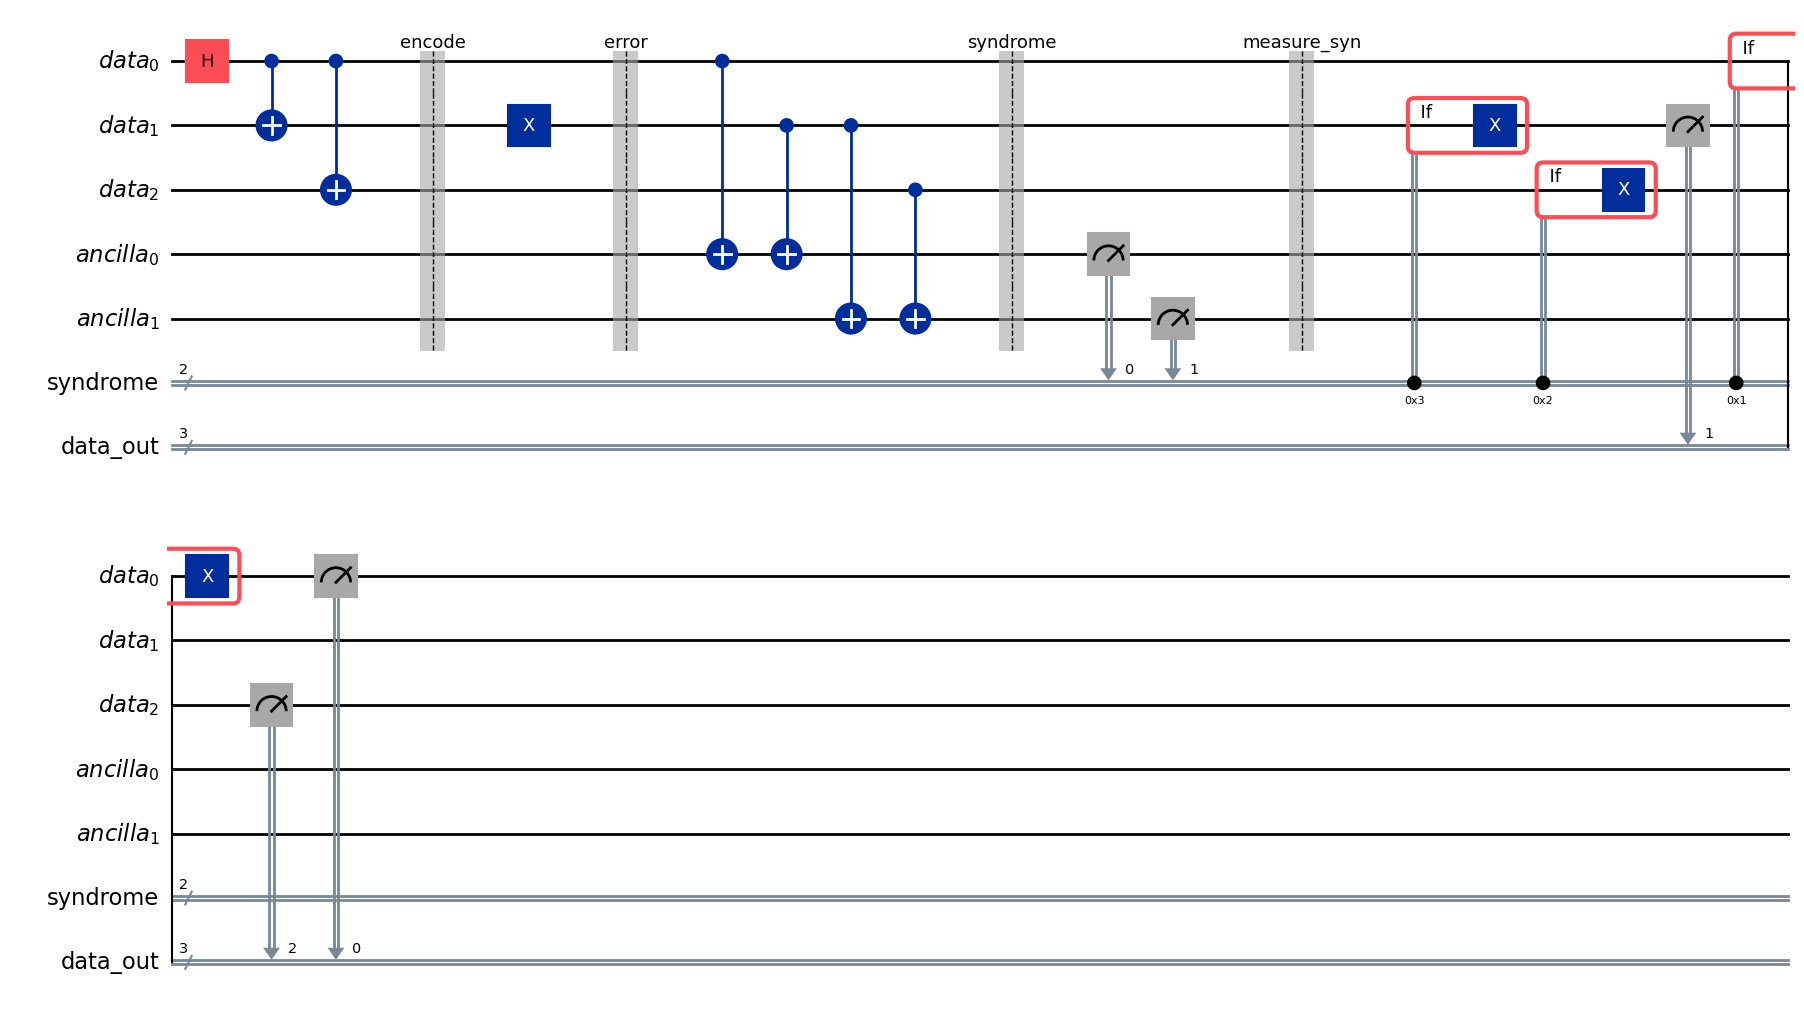

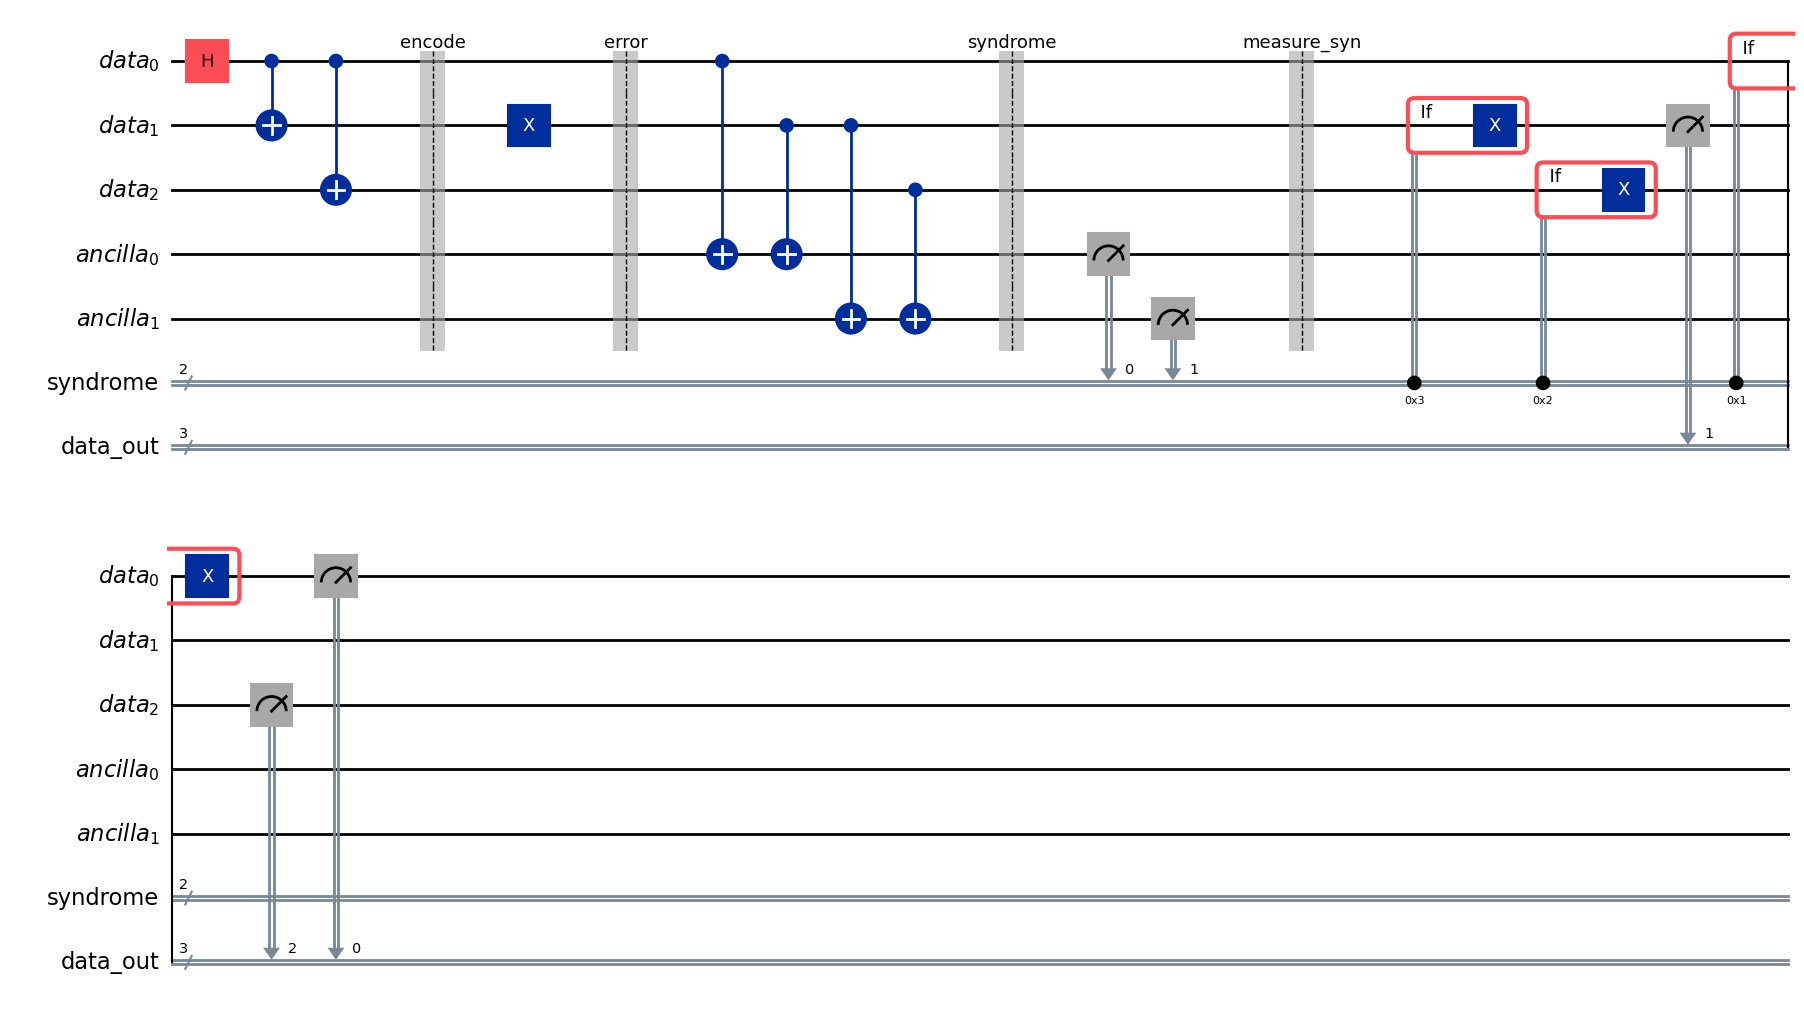

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import XGate

# We need 3 data qubits and 2 ancilla qubits
q_d = QuantumRegister(3, name='data')
q_a = QuantumRegister(2, name='ancilla')
# We need 2 classical bits for the syndrome
c_syn = ClassicalRegister(2, name='syndrome')
# We need 3 classical bits to measure the final data
c_data = ClassicalRegister(3, name='data_out')

qc = QuantumCircuit(q_d, q_a, c_syn, c_data)

# 1. Encode |+> state
qc.h(q_d[0])
qc.cx(q_d[0], q_d[1])
qc.cx(q_d[0], q_d[2])
qc.barrier(label='encode')

# 2. Add an Error!
qc.x(q_d[1]) # Let's hit the middle qubit
qc.barrier(label='error')

# 3. Syndrome Measurement
qc.cx(q_d[0], q_a[0])
qc.cx(q_d[1], q_a[0])
qc.cx(q_d[1], q_a[1])
qc.cx(q_d[2], q_a[1])
qc.barrier(label='syndrome')

# Measure the ancillas into the syndrome register
qc.measure(q_a, c_syn)
qc.barrier(label='measure_syn')

# 4. Correction (Corrected Syntax and Logic)
# 4. Correction (Alternative modern syntax)
with qc.if_test((c_syn, 3)):
    qc.x(q_d[1])
with qc.if_test((c_syn, 2)):
    qc.x(q_d[2])
with qc.if_test((c_syn, 1)):
    qc.x(q_d[0])

# 5. Measure the final, corrected data
qc.measure(q_d, c_data)

# Now this will work
qc.draw('mpl')

##  Exercise 2: Test the Correction
Task: Let's prove our circuit works.

1. Run the circuit: Execute the qc from above on the aer_simulator using Sampler.

2. Analyze: What should the final data_out be? We started with $|+\rangle_L = \frac{|000\rangle + |111\rangle}{\sqrt{2}}$. Even after the error and correction, the final state should be this. Measuring this gives 000 or 111.

3. Remove the error: Comment out qc.x(q_d[1]).

4. Run again: Run the no-error circuit. The data_out should still be 000 or 111.

This proves the code correctly fixes the error when it happens, and does nothing when it doesn't!

###  Your Answer

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

In [ ]:
# --- Your Code Goes Here ---

# Fill in the Blanks: 3-Qubit Bit-Flip Code (Code Version)

# Complete the code by filling in the blanks (replace ___ with the correct code):

# --- Define Registers ---
q_d = QuantumRegister(___, name='data')
q_a = QuantumRegister(___, name='ancilla')
c_syn = ClassicalRegister(___, name='syndrome')
c_data = ClassicalRegister(___, name='data_out')

# --- Circuit 1: WITH Error ---
qc = QuantumCircuit(q_d, q_a, c_syn, c_data)
qc.h(q_d[___])
qc.cx(q_d[0], q_d[___])
qc.cx(q_d[0], q_d[___])
qc.barrier(label='encode')
qc.x(q_d[___]) # The error
qc.barrier(label='error')
qc.cx(q_d[0], q_a[___])
qc.cx(q_d[___], q_a[0])
qc.cx(q_d[___], q_a[1])
qc.cx(q_d[___], q_a[1])
qc.barrier(label='syndrome')
qc.measure(q_a, c_syn)
qc.barrier(label='measure_syn')
with qc.if_test((c_syn, ___)):
    qc.x(q_d[___])
with qc.if_test((c_syn, ___)):
    qc.x(q_d[___])
with qc.if_test((c_syn, ___)):
    qc.x(q_d[___])
qc.barrier(label='correct')
qc.measure(q_d, c_data)

# --- Simulation Code ---
sim = AerSimulator()
job_with_error = sim.run(qc, shots=___)
result_with_error = job_with_error.result()
counts_with_error = result_with_error.get_counts(qc)
print("Results WITH error and correction")
fig1 = plot_histogram(counts_with_error, title="With Error + Correction")
plt.show()

### 💡 Solution

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

# --- Define Registers ---
q_d = QuantumRegister(3, name='data')
q_a = QuantumRegister(2, name='ancilla')
c_syn = ClassicalRegister(2, name='syndrome')
c_data = ClassicalRegister(3, name='data_out')

# --- Circuit 1: WITH Error ---
qc = QuantumCircuit(q_d, q_a, c_syn, c_data)
qc.h(q_d[0])
qc.cx(q_d[0], q_d[1])
qc.cx(q_d[0], q_d[2])
qc.barrier(label='encode')
qc.x(q_d[1]) # The error
qc.barrier(label='error')
qc.cx(q_d[0], q_a[0])
qc.cx(q_d[1], q_a[0])
qc.cx(q_d[1], q_a[1])
qc.cx(q_d[2], q_a[1])
qc.barrier(label='syndrome')
qc.measure(q_a, c_syn)
qc.barrier(label='measure_syn')
with qc.if_test((c_syn, 3)):
    qc.x(q_d[1])
with qc.if_test((c_syn, 2)):
    qc.x(q_d[2])
with qc.if_test((c_syn, 1)):
    qc.x(q_d[0])
qc.barrier(label='correct')
qc.measure(q_d, c_data)

# --- Simulation Code ---
sim = AerSimulator()
job_with_error = sim.run(qc, shots=1000)
result_with_error = job_with_error.result()
counts_with_error = result_with_error.get_counts(qc)
print("Results WITH error and correction ")
fig1 = plot_histogram(counts_with_error, title="With Error + Correction")
plt.show()

#  Build a new circuit without the error
qc_no_error = QuantumCircuit(q_d, q_a, c_syn, c_data)
qc_no_error.h(q_d[0])
qc_no_error.cx(q_d[0], q_d[1])
qc_no_error.cx(q_d[0], q_d[2])
qc_no_error.barrier()
# NO ERROR LINE
qc_no_error.barrier()
qc_no_error.cx(q_d[0], q_a[0])
qc_no_error.cx(q_d[1], q_a[0])
qc_no_error.cx(q_d[1], q_a[1])
qc_no_error.cx(q_d[2], q_a[1])
qc_no_error.barrier()
qc_no_error.measure(q_a, c_syn)
qc_no_error.barrier()
with qc_no_error.if_test((c_syn, 3)):
    qc_no_error.x(q_d[1])
with qc_no_error.if_test((c_syn, 2)):
    qc_no_error.x(q_d[2])
with qc_no_error.if_test((c_syn, 1)):
    qc_no_error.x(q_d[0])
qc_no_error.barrier()
qc_no_error.measure(q_d, c_data)

job_no_error = sim.run(qc_no_error, shots=1000)
result_no_error = job_no_error.result()
counts_no_error = result_no_error.get_counts(qc_no_error)
print("\n Results WITHOUT error ")
fig2 = plot_histogram(counts_no_error, title="Without Error")
plt.show()

###  Section 2: The 9-Qubit Shor Code
The bit-flip code only fixes $X$ errors. What about $Z$ (phase-flip) errors?

- A phase-flip code is just a bit-flip code in the $H$ basis.

- Encode: $|0\rangle \rightarrow |+++\rangle$, $|1\rangle \rightarrow |---\rangle$

- Syndromes: Measure $X_0X_1$ and $X_1X_2$.

- But what about $Y$ errors? A $Y$ error is $Y = iZX$. It's a bit-flip and a phase-flip.

- The Shor Code combines (concatenates) these two ideas:

- Outer Code (Phase-Flip): First, encode 1 qubit into 3 qubits ($q_0, q_1, q_2$) to protect against phase-flips.

- Inner Code (Bit-Flip): Then, encode each of those 3 qubits into 3 more qubits to protect against bit-flips.
- $q_0 \rightarrow (q_{00}, q_{01}, q_{02})$
- $q_1 \rightarrow (q_{10}, q_{11}, q_{12})$
- $q_2 \rightarrow (q_{20}, q_{21}, q_{22})$

- Total Qubits: 1 (logical) $\rightarrow$ 9 (physical).This code can correct any single-qubit error ($X$, $Y$, or $Z$) on any of the 9 qubits.

##  Section 3: The Future - Surface Codes & qiskit_qec

The Shor code is not very efficient (9 qubits for 1). The most promising codes for fault-tolerance are Surface Codes.

Concept:
- Qubits are arranged on a 2D grid.

- We measure local stabilizers (e.g., $ZZZZ$ on "data" plaquettes and $XXXX$ on "syndrome" plaquettes) over and over.

- Errors create "defects" in the syndrome, and a complex classical decoder (like "minimum-weight perfect matching") figures out where the errors most likely occurred.

- The qiskit_qec Package:Qiskit has a brand-new package dedicated to QEC! It has built-in definitions for many codes.

- Task: Let's use qiskit_qec to define our 3-qubit bit-flip code (which it calls a RepetitionCode).

### Your Answer
Task:

Import RepetitionCode from qiskit_qec.codes.

Create a code with d=3 (distance 3, our 3-qubit code) and T=1 (1 round of syndrome measurement).

Draw the circuit!

In [ ]:
# --- Your Code Goes Here ---
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Define registers
q_d = QuantumRegister(_, name='data')
q_a = QuantumRegister(_, name='ancilla')
c_syn = ClassicalRegister(_, name='syndrome')
c_data = ClassicalRegister(_, name='data_out')

# Build the circuit
qc = QuantumCircuit(q_d, q_a, c_syn, c_data)
qc.h(q_d[_])
qc.cx(q_d[_], q_d[_])
qc.cx(q_d[0], q_d[2])
qc.barrier(label='encode')
# (Optional) Add error here if desired, e.g. qc.x(q_d[1])
qc.barrier(label='error')
qc.cx(_)#######                             @###)
qc.cx(q_)
qc.cx(_)
qc.cx(_)
qc.barrier(label='syndrome')
qc.measure(q_a, c_syn)
qc.barrier(label='measure_syn')
with qc.if_test((c_syn, 3)):
    qc.x(q_d[1])
with qc.if_test((c_syn, 2)):
    qc.x(q_d[2])
with qc.if_test((c_syn, 1)):
    qc.x(q_d[0])
qc.barrier(label='correct')
qc.measure(q_d, c_data)

# Draw the circuit
qc.draw('mpl')

### 💡 Solution

In [ ]:
# --- Solution Code: Manual 3-Qubit Bit-Flip Code (Qiskit Core) ---
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Define registers
q_d = QuantumRegister(3, name='data')
q_a = QuantumRegister(2, name='ancilla')
c_syn = ClassicalRegister(2, name='syndrome')
c_data = ClassicalRegister(3, name='data_out')

# Build the circuit
qc = QuantumCircuit(q_d, q_a, c_syn, c_data)
qc.h(q_d[0])
qc.cx(q_d[0], q_d[1])
qc.cx(q_d[0], q_d[2])
qc.barrier(label='encode')
# (Optional) Add error here if desired, e.g. qc.x(q_d[1])
qc.barrier(label='error')
qc.cx(q_d[0], q_a[0])
qc.cx(q_d[1], q_a[0])
qc.cx(q_d[1], q_a[1])
qc.cx(q_d[2], q_a[1])
qc.barrier(label='syndrome')
qc.measure(q_a, c_syn)
qc.barrier(label='measure_syn')
with qc.if_test((c_syn, 3)):
    qc.x(q_d[1])
with qc.if_test((c_syn, 2)):
    qc.x(q_d[2])
with qc.if_test((c_syn, 1)):
    qc.x(q_d[0])
qc.barrier(label='correct')
qc.measure(q_d, c_data)

# Draw the circuit
qc.draw('mpl')

This package lets you build complex circuits for error correction and decoding with just a few lines of code!

# Conclusion
You've now mastered the fundamentals of Quantum Error Correction!

You learned:

QEC actively detects and corrects errors, unlike QEM.

This is achieved through redundancy (logical qubits) and syndrome measurements.

We built the 3-qubit bit-flip code from scratch.

We learned the theory of the 9-qubit Shor code, which can fix any single-qubit error.

We were introduced to Surface Codes and the qiskit_qec package, which are the future of fault-tolerant quantum computing.

You are now well-equipped to understand the cutting-edge research happening in quantum computing. Great job!